In [24]:
from __future__ import print_function
import numpy as np
import scipy as sp
from scipy import stats as stats
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['poisson', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#Set random for reproducibility

np.random.seed(6)

In [62]:
# Prepare a Poisson distribution

samples = 250
n = 1000
mu  = 75
sigma = np.sqrt(mu)

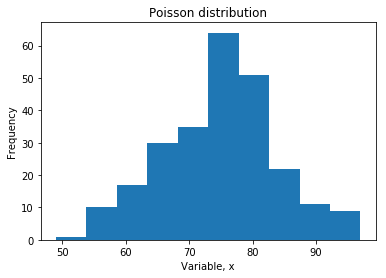

In [72]:
# Plot the distribution

poisson = np.random.poisson(mu, size=samples)
plt.hist(poisson)
plt.xlabel('Variable, x')
plt.ylabel('Frequency')
plt.title('Poisson distribution')
plt.show()

## Figure 1: Poisson distribution resampled 700 times from n = 500, mu = 75

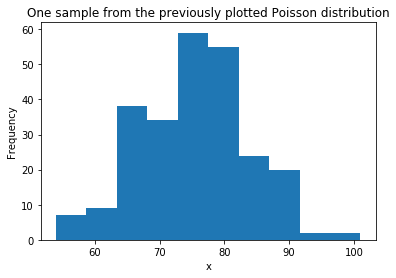

In [73]:
#plot a given sample from this distribution

#first, get the samples:

distribution_mu = np.zeros(n)

#then populate it:

for sample in range (n):
    poisson = stats.poisson.rvs(mu=mu, size=samples)
    distribution_mu[sample] = poisson.mean()
    
plt.hist(poisson)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('One sample from the previously plotted Poisson distribution')

plt.show()

## Figure 2: Sample from populated Poisson distribution

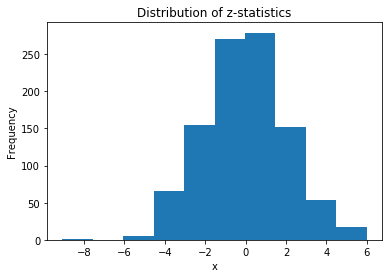

In [77]:
# Now to plot the distribution of z-statistics

# H_0 is that the z-statistics distribution is Gaussian
# significance threshold = 5%, 0.05


#Standard score z = x - mu / sigma

z = (mu - distribution_mu) * (np.sqrt(n) / sigma)

plt.hist(z)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Distribution of z-statistics')
plt.show()

## Figure 3: Plot of the distribution of z-statistics for the Poisson distribution

In [80]:
sp.stats.anderson(z, 'norm')

AndersonResult(statistic=0.21413077460965724, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

## For our Anderson-Darling result, the critical value for the previously chosen significance level of 5% or 0.05 is 0.784. The AD statistic is 0.214. 

## Because 0.214 < 0.784, the AD statistic is less than the critical value for the significance level. As a result, we fail to reject the null hypothesis; that is, the z-statistic distribution could be Gaussian.